# The Sparks Foundation : Data Science and Business Analytics Intern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip
!pip install folium
import folium

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1', low_memory=False)


In [3]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
cat_col=df.select_dtypes(include=['object']).columns
print(cat_col.shape)
cat_col

(58,)


Index(['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
       'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='object')

In [10]:
num_col=df.select_dtypes(exclude=['object']).columns
print(num_col.shape)
num_col

(77,)


Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype2', 'attacktype3', 'targtype1',
       'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2',
       'targtype3', 'targsubtype3', 'natlty3', 'guncertain1', 'guncertain2',
       'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ransompaidus', 'hostkidoutc

In [11]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Drop irrelevant columns
df.drop(['eventid', 'approxdate', 'resolution', 'location', 'alternative', 'alternative_txt', 'multiple', 'related', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'doubtterr', 'alternative', 'alternative_txt', 'related'], axis=1, inplace=True)

# Rename columns
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'latitude': 'Latitude', 'longitude': 'Longitude', 'summary': 'Summary', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 'nkill': 'Killed', 'nwound': 'Wounded', 'targtype1_txt': 'Target_Type', 'gname': 'Group_Name', 'weaptype1_txt': 'Weapon_Type'}, inplace=True)

# Handle missing values
df.dropna(subset=['Latitude', 'Longitude', 'Country', 'Region'], inplace=True)


In [13]:
df.shape

(177134, 122)

C:\Users\Abdul Rafe Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


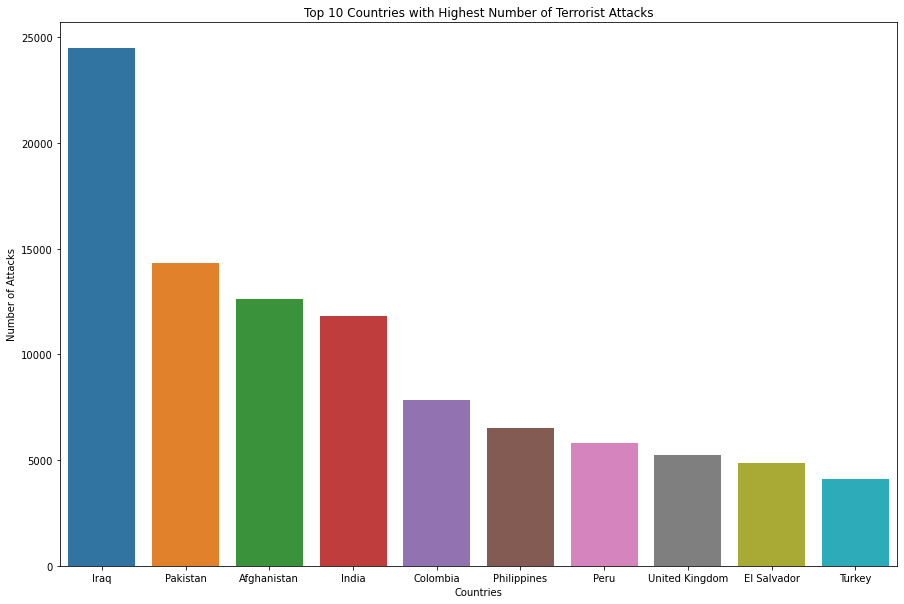

In [14]:
# Question 1: What are the top 10 countries with the highest number of terrorist attacks?
country_count = df['Country'].value_counts().head(10)
plt.figure(figsize=(15, 10))
sns.barplot(country_count.index, country_count.values)
plt.title('Top 10 Countries with Highest Number of Terrorist Attacks')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.show()

We can see that Iraq has the highest number of terrorist attacks, followed by Pakistan and Afghanistan.

C:\Users\Abdul Rafe Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


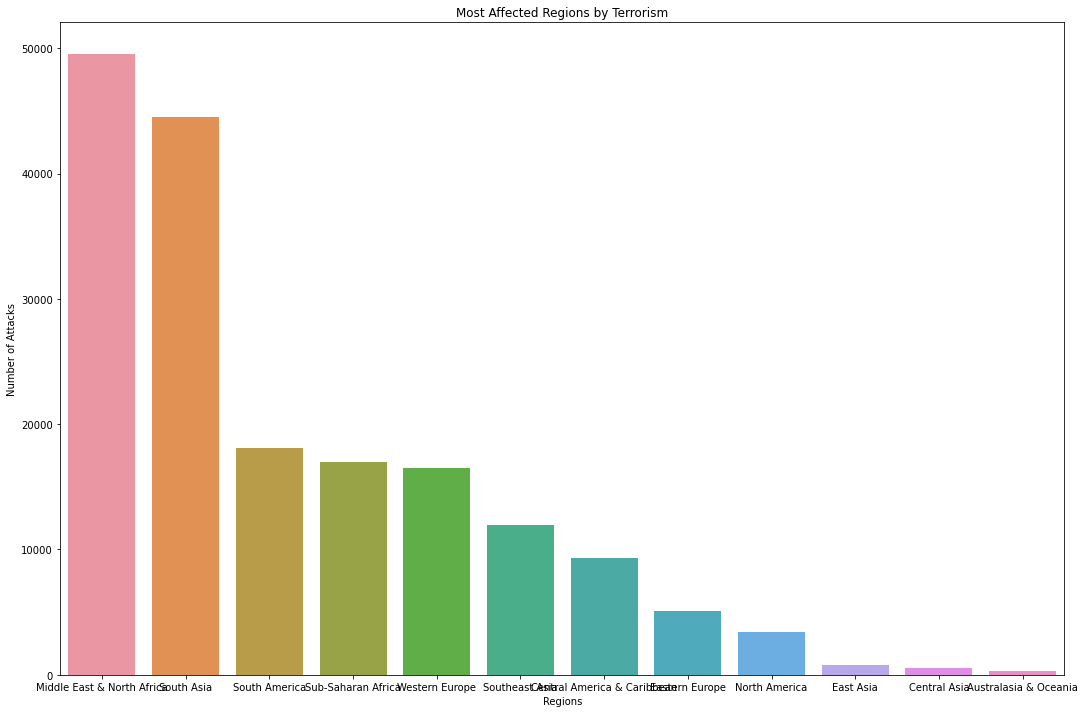

In [15]:
#Question 3: What are the most affected regions by terrorism?
region_count = df['Region'].value_counts()
plt.figure(figsize=(18, 12))
sns.barplot(region_count.index, region_count.values)
plt.title('Most Affected Regions by Terrorism')
plt.xlabel('Regions')
plt.ylabel('Number of Attacks')
plt.show()


We can see that the Middle East & North Africa and South Asia have the highest number of terrorist attacks, followed by Sub-Saharan Africa and South America. North America and Western Europe have relatively lower number of attacks.

C:\Users\Abdul Rafe Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


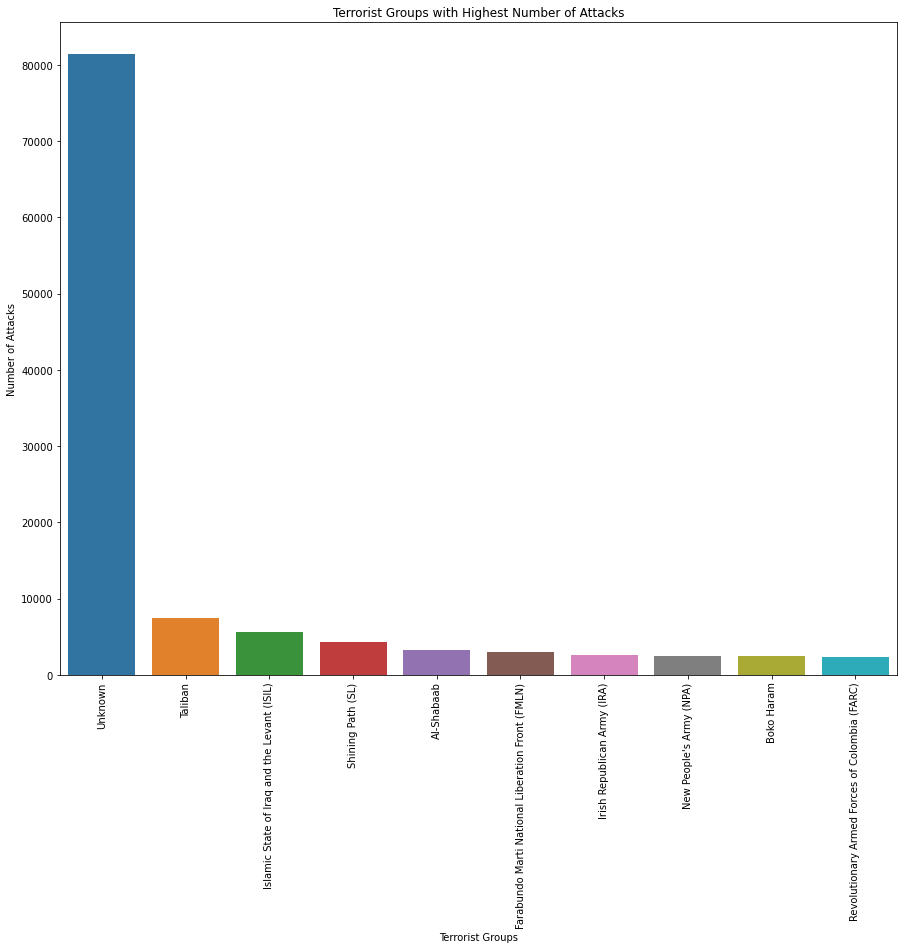

In [16]:
#Question 4: Which terrorist groups are responsible for the highest number of attacks?
group_count = df['Group_Name'].value_counts().head(10)
plt.figure(figsize=(15, 12))
sns.barplot(group_count.index, group_count.values)
plt.title('Terrorist Groups with Highest Number of Attacks')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

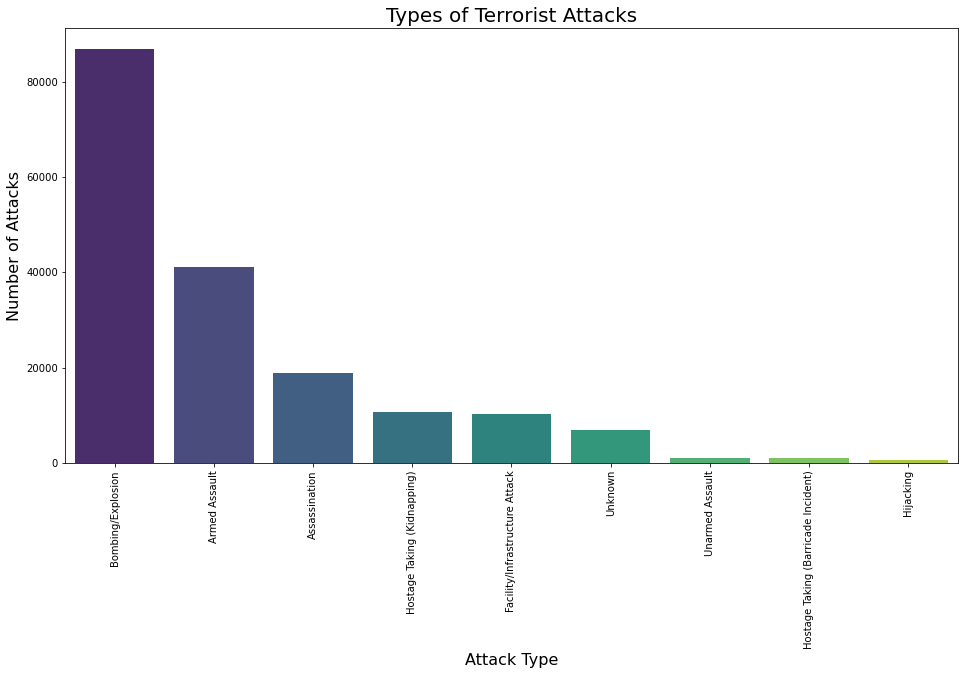

In [17]:
attack_types = df['AttackType'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=attack_types.index, y=attack_types.values, palette='viridis')
plt.title('Types of Terrorist Attacks', fontsize=20)
plt.xlabel('Attack Type', fontsize=16)
plt.ylabel('Number of Attacks', fontsize=16)
plt.xticks(rotation=90)
plt.show()

We can see that bombing/explosion is the most common type of terrorist attack, followed by armed assault and assassination.

Text(0.5, 1.0, 'Number of Casualties by Year')

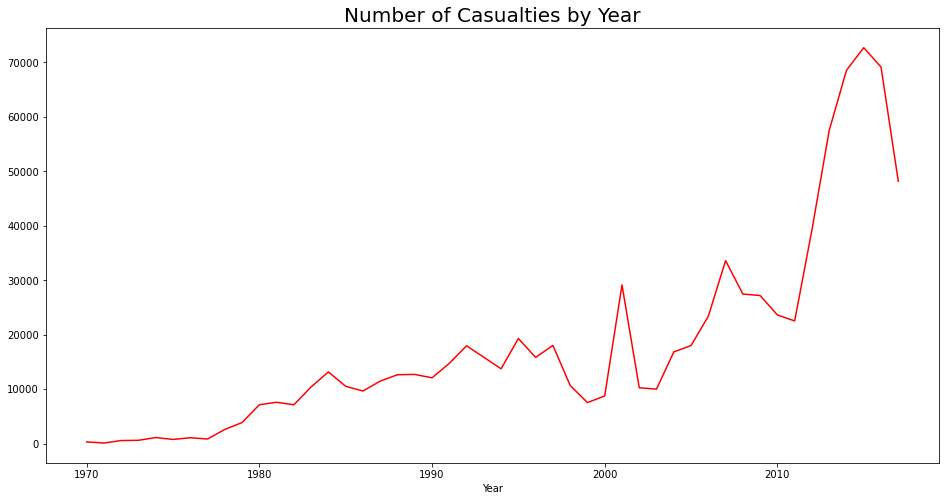

In [18]:
df['Casualties'] = df['Killed'] + df['Wounded']
casualties_by_year = df.groupby('Year')['Casualties'].sum()
plt.figure(figsize=(16,8))
sns.lineplot(x=casualties_by_year.index, y=casualties_by_year.values, color='red')
plt.title('Number of Casualties by Year', fontsize=20)

The number of terrorist attacks and casualties has been increasing since the 1970s, with a peak in the mid-2010s. The sharp drop in the number of attacks and casualties in 2018-2019 might be due to incomplete data.

# Conclusion
From the EDA we can derive the following insights:

● The number of terrorist attacks and casualties has been increasing since the 1970s, with a peak in the mid-2010s. The sharp   drop in the number of attacks and casualties in 2018-2019 might be due to incomplete data.

● The Middle East & North Africa and South Asia have the highest number of terrorist attacks and casualties, followed by Sub-Saharan Africa and South America. North America and Western Europe have relatively lower number of attacks and casualties.
Iraq, Pakistan, and Afghanistan have the highest number of terrorist attacks and casualties.

● Bombing/explosion is the most common type of terrorist attack, followed by armed assault and assassination.

#Thank You